<a href="https://colab.research.google.com/github/naoya5614/Practice/blob/main/Edit_gasyori100knock_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 画像処理100本ノック(60~70問)

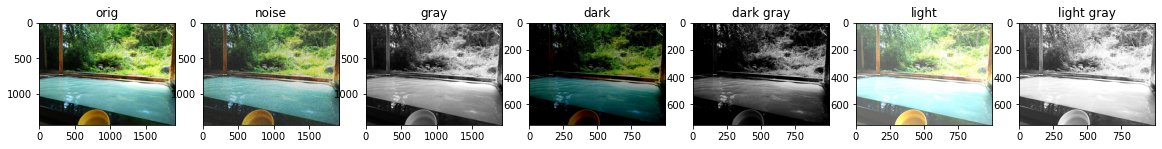

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('https://github.com/naoya5614/Practice/blob/main/img/sample05.jpg?raw=true')
img_128 = io.imread('https://github.com/naoya5614/Practice/blob/main/img/sample09.png?raw=true')
img_gray_128 = cv2.cvtColor(img_128, cv2.COLOR_RGB2GRAY)
img_noise = io.imread('https://github.com/naoya5614/Practice/blob/main/img/sample06.jpg?raw=true')
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
img_dark = io.imread('https://github.com/naoya5614/Practice/blob/main/img/sample07.jpg?raw=true')
img_dark_gray = cv2.cvtColor(img_dark, cv2.COLOR_RGB2GRAY)
img_light = io.imread('https://github.com/naoya5614/Practice/blob/main/img/sample08.jpg?raw=true')
img_light_gray = cv2.cvtColor(img_light, cv2.COLOR_RGB2GRAY)
img_thorino = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/thorino.jpg')
img_thorino_gray = cv2.cvtColor(img_thorino, cv2.COLOR_RGB2GRAY)

img_eye = io.imread("https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_eye.png")
img_eye = cv2.cvtColor(img_eye, cv2.COLOR_RGBA2RGB)

img_seg = io.imread("https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/seg_sample.png")
img_connect = io.imread("https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/connect_sample.png")
img_gazo = io.imread("https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/gazo_sample.png")

plt.figure(figsize=(20, 4))
plt.subplot(1, 7, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 7, 2); plt.imshow(img_noise); plt.title('noise')
plt.subplot(1, 7, 3); plt.imshow(img_gray, cmap='gray'); plt.title('gray')
plt.subplot(1, 7, 4); plt.imshow(img_dark);  plt.title('dark')
plt.subplot(1, 7, 5); plt.imshow(img_dark_gray, cmap='gray'); plt.title('dark gray')
plt.subplot(1, 7, 6); plt.imshow(img_light);  plt.title('light')
plt.subplot(1, 7, 7); plt.imshow(img_light_gray, cmap='gray'); plt.title('light gray')
plt.show()

## Q.61 4-連結数

connect_sample.png を4-連結数により、色分けせよ。

4-連結数とは近傍との画素の状態を見る値である。 通常、近傍は注目画素x0(x,y)が0でない場合に対して、次のように定義される。

*   x4(x-1,y-1) x3(x,y-1) x2(x+1,y-1)
*   x5(x-1,y) x0(x,y) x1(x+1,y)
*   x6(x-1,y+1) x7(x,y+1) x8(x+1,y+1)


ここで4連結数とは、次式で計算される。


*   S = (x1 - x1 x2 x3) + (x3 - x3 x4 x5) + (x5 - x5 x6 x7) + (x7 - x7 x8 x1)
S = [0,4]の範囲をとり、

*   S = 0 は内部点
*   S = 1 は端点
*   S = 2 は連結点
*   S = 3 は分岐点
*   S = 4 は交差点 を示す。

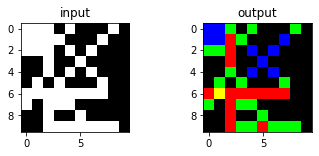

In [2]:
def connect_4(img):
    # get shape
    h, w = img.shape

    # prepare temporary image
    tmp = np.zeros((h, w), dtype=int)

    # binarize
    tmp[img > 0] = 1

    # prepare out image
    out = np.zeros((h, w, 3), dtype=np.uint8)

    # each pixel
    for y in range(h):
        for x in range(w):
            if tmp[y, x] < 1:
                continue

            S = 0
            S += (tmp[y,min(x + 1,w - 1)] - tmp[y,min(x + 1,w - 1)] * tmp[max(y - 1,0),min(x + 1,w - 1)] * tmp[max(y - 1, 0), x])
            S += (tmp[max(y - 1, 0), x] - tmp[max(y - 1, 0), x] * tmp[max(y - 1, 0),max(x - 1, 0)] * tmp[y, max(x - 1, 0)])
            S += (tmp[y,max(x - 1, 0)] - tmp[y, max(x - 1, 0)] * tmp[min(y + 1, h - 1),max(x - 1, 0)] * tmp[min(y + 1, h - 1), x])
            S += (tmp[min(y + 1, h - 1), x] - tmp[min(y + 1, h - 1), x] * tmp[min(y + 1, h - 1),min(x + 1, w - 1)] * tmp[y, min(x + 1,w - 1)])
            
            if S == 0:
                out[y, x] = [0, 0, 255]
            elif S == 1:
                out[y, x] = [0, 255, 0]
            elif S == 2:
                out[y, x] = [255, 0, 0]
            elif S == 3:
                out[y, x] = [255, 255, 0]
            elif S == 4:
                out[y, x] = [255, 0, 255]
                    
    out = out.astype(np.uint8)

    return out

out = connect_4(img_connect)

fig, ax = plt.subplots(1, 2, figsize=(6, 2))
ax[0].set_title("input")
ax[0].imshow(img_connect, cmap="gray")
ax[1].set_title("output")
ax[1].imshow(out, cmap="gray")
plt.show()

## Q.62 8-連結数

connect_sample.pngを8-連結数により、色分けせよ。

8連結数とは

S = (x1 - x1 x2 x3) + (x3 - x3 x4 x5) + (x5 - x5 x6 x7) + (x7 - x7 x8 x1)

において各xの値の0と1を反転させた値を用いる。

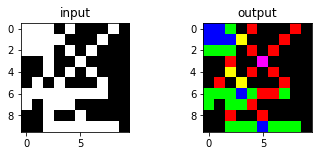

In [3]:
def connect_8(img):
    # get shape
    h, w = img.shape

    # prepare temporary
    _tmp = np.zeros((h, w), dtype=int)

    # get binarize
    _tmp[img > 0] = 1

    # inverse for connect 8
    tmp = 1 - _tmp

    # prepare image
    out = np.zeros((h, w, 3), dtype=np.uint8)

    # each pixel
    for y in range(h):
        for x in range(w):
            if _tmp[y, x] < 1:
                continue

            S = 0
            S += (tmp[y,min(x + 1, w - 1)] - tmp[y, min(x + 1,w - 1)] * tmp[max(y - 1, 0),min(x + 1, w - 1)] * tmp[max(y - 1, 0), x])
            S += (tmp[max(y - 1, 0), x] - tmp[max(y - 1, 0), x] * tmp[max(y - 1, 0), max(x - 1, 0)] * tmp[y, max(x - 1, 0)])
            S += (tmp[y, max(x - 1, 0)] - tmp[y, max(x - 1, 0)] * tmp[min(y + 1, h - 1), max(x - 1, 0)] * tmp[min(y + 1, h - 1), x])
            S += (tmp[min(y + 1, h - 1), x] - tmp[min(y + 1, h - 1), x] * tmp[min(y + 1, h - 1), min(x + 1, w - 1)] * tmp[y, min(x + 1, w - 1)])
            
            if S == 0:
                out[y, x] = [0, 0, 255]
            elif S == 1:
                out[y, x] = [0, 255, 0]
            elif S == 2:
                out[y, x] = [255, 0, 0]
            elif S == 3:
                out[y, x] = [255, 255, 0]
            elif S == 4:
                out[y, x] = [255, 0, 255]
                    
    out = out.astype(np.uint8)

    return out

out = connect_8(img_connect)

fig, ax = plt.subplots(1, 2, figsize=(6, 2))
ax[0].set_title("input")
ax[0].imshow(img_connect, cmap="gray")
ax[1].set_title("output")
ax[1].imshow(out, cmap="gray")
plt.show()

## Q.63 細線化処理

gazo_sample.png を細線化せよ。

細線化とは画素の幅を1にする処理であり、ここでは次のアルゴリズムに沿って処理を行え。

左上からラスタスキャンする。 x0(x,y)=0ならば、処理なし。x0(x,y)=1ならば次の3条件を満たす時にx0=0に変える。

*   注目画素の4近傍に0が一つ以上存在する
*   x0の4-連結数が1である
*   x0の8近傍に1が3つ以上存在する

1回のラスタスキャンで2の変更数が0になるまで、ラスタスキャンを繰り返す。
細線化にはヒルディッチのアルゴリズム(Q.64)や、Zhang-Suenのアルゴリズム(Q.65)、田村のアルゴリズムなどが存在する。

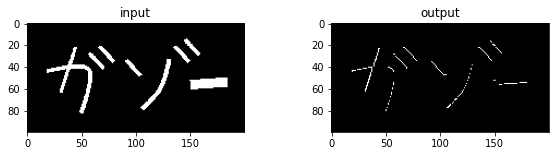

In [4]:
def thinning(img):
    # get shape
    h, w = img.shape

    # prepare out image
    out = np.zeros((h, w), dtype=int)
    out[img > 0] = 1

    count = 1
    while count > 0:
        count = 0
        tmp = out.copy()
        # each pixel ( rasta scan )
        for y in range(h):
            for x in range(w):
                # skip black pixel
                if out[y, x] < 1:
                    continue
                
                # count satisfied conditions
                judge = 0
                
                ## condition 1
                if (tmp[y, min(x + 1, w - 1)] + tmp[max(y - 1, 0), x] + tmp[y, max(x - 1, 0)] + tmp[min(y + 1, h - 1), x]) < 4:
                    judge += 1
                    
                ## condition 2
                c = 0
                c += (tmp[y, min(x + 1, w - 1)] - tmp[y, min(x + 1, w - 1)] * tmp[max(y - 1, 0), min(x + 1,  w - 1)] * tmp[max(y - 1, 0), x])
                c += (tmp[max(y - 1, 0), x] - tmp[max(y - 1, 0), x] * tmp[max(y - 1, 0), max(x - 1, 0)] * tmp[y, max(x - 1, 0)])
                c += (tmp[y, max(x - 1, 0)] - tmp[y ,max(x - 1, 0)] * tmp[min(y + 1, h - 1), max(x - 1, 0)] * tmp[min(y + 1, h - 1), x])
                c += (tmp[min(y + 1, h - 1), x] - tmp[min(y + 1, h - 1), x] * tmp[min(y + 1, h - 1), min(x + 1, w - 1)] * tmp[y, min(x + 1,  w - 1)])
                if c == 1:
                    judge += 1
                    
                ##x condition 3
                if np.sum(tmp[max(y - 1, 0) : min(y + 2, h), max(x - 1, 0) : min(x + 2, w)]) >= 4:
                    judge += 1
                
                # if all conditions are satisfied
                if judge == 3:
                    out[y, x] = 0
                    count += 1

    out = out.astype(np.uint8) * 255

    return out


out = thinning(img_gazo)

fig, ax = plt.subplots(1, 2, figsize=(10, 2))
ax[0].set_title("input")
ax[0].imshow(img_gazo, cmap="gray")
ax[1].set_title("output")
ax[1].imshow(out, cmap="gray")
plt.show()

## Q.64 ヒルディッチの細線化

gazo_sample.png にヒルディッチの細線化を行え。

アルゴリズムは、次の通り。

1. 左上からラスタスキャンする。
2. x0(x,y)=0ならば、処理なし。x0(x,y)=1ならば次の5条件を満たす時にx0=-1に変える。

*   注目画素の4近傍に0が一つ以上存在する
*   x0の8-連結数が1である
*   x1〜x8の絶対値の合計が2以上
*   x0の8近傍に1が1つ以上存在する
*   xn(n=1〜8)全てに対して以下のどちらかが成り立つ – xnが-1以外 – xnを0とした時、x0の8-連結数が1である


3. 各画素の-1を0に変える
4. 一回のラスタスキャンで3の変更数が0になるまで、ラスタスキャンを繰り返す。

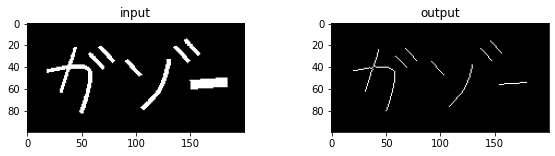

In [5]:
def hilditch_thinning(img):
    # get shape
    H, W = img.shape

    # prepare out image
    out = np.zeros((H, W), dtype=int)
    out[img > 0] = 1

    # inverse pixel value
    tmp = out.copy()
    _tmp = 1 - tmp

    count = 1
    while count > 0:
        count = 0
        tmp = out.copy()
        _tmp = 1 - tmp

        tmp2 = out.copy()
        _tmp2 = 1 - tmp2
        
        # each pixel
        for y in range(H):
            for x in range(W):
                # skip black pixel
                if out[y, x] < 1:
                    continue
                
                judge = 0
                
                ## condition 1
                if (tmp[y, min(x+1, W-1)] * tmp[max(y-1,0 ), x] * tmp[y, max(x-1, 0)] * tmp[min(y+1, H-1), x]) == 0:
                    judge += 1
                    
                ## condition 2
                c = 0
                c += (_tmp[y, min(x+1, W-1)] - _tmp[y, min(x+1, W-1)] * _tmp[max(y-1, 0), min(x+1, W-1)] * _tmp[max(y-1, 0), x])
                c += (_tmp[max(y-1, 0), x] - _tmp[max(y-1, 0), x] * _tmp[max(y-1, 0), max(x-1, 0)] * _tmp[y, max(x-1, 0)])
                c += (_tmp[y, max(x-1, 0)] - _tmp[y, max(x-1, 0)] * _tmp[min(y+1, H-1), max(x-1, 0)] * _tmp[min(y+1, H-1), x])
                c += (_tmp[min(y+1, H-1), x] - _tmp[min(y+1, H-1), x] * _tmp[min(y+1, H-1), min(x+1, W-1)] * _tmp[y, min(x+1, W-1)])
                if c == 1:
                    judge += 1
                    
                ## condition 3
                if np.sum(tmp[max(y-1, 0) : min(y+2, H), max(x-1, 0) : min(x+2, W)]) >= 3:
                    judge += 1

                ## condition 4
                if np.sum(out[max(y-1, 0) : min(y+2, H), max(x-1, 0) : min(x+2, W)]) >= 2:
                    judge += 1

                ## condition 5
                _tmp2 = 1 - out

                c = 0
                c += (_tmp2[y, min(x+1, W-1)] - _tmp2[y, min(x+1, W-1)] * _tmp2[max(y-1, 0), min(x+1, W-1)] * _tmp2[max(y-1, 0), x])
                c += (_tmp2[max(y-1, 0), x] - _tmp2[max(y-1, 0), x] * (1 - tmp[max(y-1, 0), max(x-1, 0)]) * _tmp2[y, max(x-1, 0)])
                c += (_tmp2[y, max(x-1, 0)] - _tmp2[y, max(x-1, 0)] * _tmp2[min(y+1, H-1), max(x-1, 0)] * _tmp2[min(y+1, H-1), x])
                c += (_tmp2[min(y+1, H-1), x] - _tmp2[min(y+1, H-1), x] * _tmp2[min(y+1, H-1), min(x+1, W-1)] * _tmp2[y, min(x+1, W-1)])
                if c == 1 or (out[max(y-1, 0), max(x-1,0 )] != tmp[max(y-1, 0), max(x-1, 0)]):
                    judge += 1

                c = 0
                c += (_tmp2[y, min(x+1, W-1)] - _tmp2[y, min(x+1, W-1)] * _tmp2[max(y-1, 0), min(x+1, W-1)] * (1 - tmp[max(y-1, 0), x]))
                c += ((1-tmp[max(y-1, 0), x]) - (1 - tmp[max(y-1, 0), x]) * _tmp2[max(y-1, 0), max(x-1, 0)] * _tmp2[y, max(x-1, 0)])
                c += (_tmp2[y, max(x-1,0 )] - _tmp2[y, max(x-1,0 )] * _tmp2[min(y+1, H-1), max(x-1, 0)] * _tmp2[min(y+1, H-1), x])
                c += (_tmp2[min(y+1, H-1), x] - _tmp2[min(y+1, H-1), x] * _tmp2[min(y+1, H-1), min(x+1, W-1)] * _tmp2[y, min(x+1, W-1)])
                if c == 1 or (out[max(y-1, 0), x] != tmp[max(y-1, 0), x]):
                    judge += 1

                c = 0
                c += (_tmp2[y, min(x+1, W-1)] - _tmp2[y, min(x+1, W-1)] * (1 - tmp[max(y-1, 0), min(x+1, W-1)]) * _tmp2[max(y-1, 0), x])
                c += (_tmp2[max(y-1, 0), x] - _tmp2[max(y-1, 0), x] * _tmp2[max(y-1, 0), max(x-1, 0)] * _tmp2[y, max(x-1, 0)])
                c += (_tmp2[y, max(x-1, 0)] - _tmp2[y, max(x-1, 0)] * _tmp2[min(y+1, H-1), max(x-1, 0)] * _tmp2[min(y+1, H-1), x])
                c += (_tmp2[min(y+1, H-1), x] - _tmp2[min(y+1, H-1), x] * _tmp2[min(y+1, H-1), min(x+1, W-1)] * _tmp2[y, min(x+1, W-1)])
                if c == 1 or (out[max(y-1, 0), min(x+1, W-1)] != tmp[max(y-1, 0), min(x+1, W-1)]):
                    judge += 1

                c = 0
                c += (_tmp2[y, min(x+1, W-1)] - _tmp2[y, min(x+1, W-1)] * _tmp2[max(y-1, 0), min(x+1, W-1)] * _tmp2[max(y-1, 0), x])
                c += (_tmp2[max(y-1, 0), x] - _tmp2[max(y-1, 0), x] * _tmp2[max(y-1, 0), max(x-1, 0)] * (1 - tmp[y, max(x-1, 0)]))
                c += ((1 - tmp[y, max(x-1, 0)]) - (1 - tmp[y, max(x-1, 0)]) * _tmp2[min(y+1, H-1), max(x-1, 0)] * _tmp2[min(y+1, H-1), x])
                c += (_tmp2[min(y+1, H-1), x] - _tmp2[min(y+1, H-1), x] * _tmp2[min(y+1, H-1), min(x+1, W-1)] * _tmp2[y, min(x+1, W-1)])
                if c == 1 or (out[y, max(x-1, 0)] != tmp[y, max(x-1, 0)]):
                    judge += 1
                
                if judge >= 8:
                    out[y, x] = 0
                    count += 1
                    
    out = out.astype(np.uint8) * 255

    return out


out = hilditch_thinning(img_gazo)

fig, ax = plt.subplots(1, 2, figsize=(10, 2))
ax[0].set_title("input")
ax[0].imshow(img_gazo, cmap="gray")
ax[1].set_title("output")
ax[1].imshow(out, cmap="gray")
plt.show()

## Q.65 Zhang-Suenの細線化

gazo_sample.pngにZhang-Suenの細線化を行え。

ただし、以下の操作は全て0が線、1が背景とするので、gazo.pngの値を反転させる必要があることに注意。

注目画素x1(x,y)に対して8近傍を次のように定義する。

x9 x2 x3 x8 x1 x4 x7 x6 x5 これらに対して二つのステップを考える。
1. ラスタスキャンを行い、以下の5条件を満たすピクセルを全て記録する。

*   黒画素である
*   x2, x3, …, x9, x2と時計まわりに見て、0から1に変わる回数がちょうど1
*   x2, x3, …, x9の中で1の個数が2以上6以下
*   x2, x4, x6のどれかが1
*   x4, x6, x8のどれかが1 記録したピクセルを全て1に変更する。

2. ラスタスキャンを行い、以下の5条件を満たすピクセルを全て記録する。

*   黒画素である
*   x2, x3, …, x9, x2と時計まわりに見て、0から1に変わる回数がちょうど1
*   x2, x3, …, x9の中で1の個数が2以上6以下
*   x2, x4, x8のどれかが1
*   x2, x6, x8のどれかが1 記録したピクセルを全て1に変更する。

1, 2で変更する点がなくなるまで交互に繰り返す。

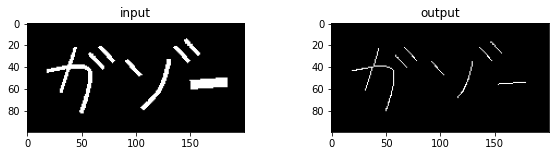

In [6]:
def zhang_suen_thinning(img):
    # get shape
    H, W = img.shape

    # prepare out image
    out = np.zeros((H, W), dtype=int)
    out[img > 0] = 1

    # inverse
    out = 1 - out

    while True:
        s1 = []
        s2 = []

        # step 1 ( rasta scan )
        for y in range(1, H-1):
            for x in range(1, W-1):
                
                # condition 1
                if out[y, x] > 0:
                    continue

                # condition 2
                f1 = 0
                if (out[y-1, x+1] - out[y-1, x]) == 1:
                    f1 += 1
                if (out[y, x+1] - out[y-1, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x+1] - out[y, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x] - out[y+1,x+1]) == 1:
                    f1 += 1
                if (out[y+1, x-1] - out[y+1, x]) == 1:
                    f1 += 1
                if (out[y, x-1] - out[y+1, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x-1] - out[y, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x] - out[y-1, x-1]) == 1:
                    f1 += 1

                if f1 != 1:
                    continue
                    
                # condition 3
                f2 = np.sum(out[y-1:y+2, x-1:x+2])
                if f2 < 2 or f2 > 6:
                    continue
                
                # condition 4
                if out[y-1, x] + out[y, x+1] + out[y+1, x] < 1:
                    continue

                # condition 5
                if out[y, x+1] + out[y+1, x] + out[y, x-1] < 1:
                    continue
                    
                s1.append([y, x])

        for v in s1:
            out[v[0], v[1]] = 1

        # step 2 ( rasta scan )
        for y in range(1, H-1):
            for x in range(1, W-1):
                
                # condition 1
                if out[y, x] > 0:
                    continue

                # condition 2
                f1 = 0
                if (out[y-1, x+1] - out[y-1, x]) == 1:
                    f1 += 1
                if (out[y, x+1] - out[y-1, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x+1] - out[y, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x] - out[y+1,x+1]) == 1:
                    f1 += 1
                if (out[y+1, x-1] - out[y+1, x]) == 1:
                    f1 += 1
                if (out[y, x-1] - out[y+1, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x-1] - out[y, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x] - out[y-1, x-1]) == 1:
                    f1 += 1

                if f1 != 1:
                    continue
                    
                # condition 3
                f2 = np.sum(out[y-1:y+2, x-1:x+2])
                if f2 < 2 or f2 > 6:
                    continue
                
                # condition 4
                if out[y-1, x] + out[y, x+1] + out[y, x-1] < 1:
                    continue

                # condition 5
                if out[y-1, x] + out[y+1, x] + out[y, x-1] < 1:
                    continue
                    
                s2.append([y, x])

        for v in s2:
            out[v[0], v[1]] = 1

        # if not any pixel is changed
        if len(s1) < 1 and len(s2) < 1:
            break

    out = 1 - out
    out = out.astype(np.uint8) * 255

    return out


out = zhang_suen_thinning(img_gazo)

fig, ax = plt.subplots(1, 2, figsize=(10, 2))
ax[0].set_title("input")
ax[0].imshow(img_gazo, cmap="gray")
ax[1].set_title("output")
ax[1].imshow(out, cmap="gray")
plt.show()

## Q.66 HOG (Step.1) 勾配強度・勾配角度

HOG特徴量の勾配強度・勾配角度を求めよ。

HOG(Histogram of Oriented Gradients)とは画像の特徴量表現の一種である。

特徴量とは画像の状態などを表すベクトル集合のことである。

画像認識(画像が何を写した画像か)や検出（画像の中で物体がどこにあるか）では、(1)画像から特徴量を得て(特徴抽出)、(2)特徴量を基に認識や検出を行う(認識・検出)。

ディープラーニングでは特徴抽出から認識までを機械学習により自動で行うため、HOGなどは見られなくなっているが、ディープラーニングが流行る前まではHOGは特徴量表現としてよく使われたらしい。

HOGは以下のアルゴリズムで得られる。

1. 画像をグレースケール化し、x、ｙ方向の輝度勾配を求める

*   x方向: gx = I(x+1, y) - I(x-1, y)
*   y方向: gy = I(x, y+1) - I(x, y-1)

2. gx, gyから勾配強度と勾配角度を求める。

*   勾配強度: mag = sqrt(gt ** 2 + gy ** 2)
*   勾配角度: ang = arctan(gy / gx)

3. 勾配角度を [0, 180]で9分割した値に量子化する。つまり、[0,20]には0、[20, 40]には1というインデックスを求める。
4. 画像をN x Nの領域に分割し(この領域をセルという)、セル内で3で求めたインデックスのヒストグラムを作成する。ただし、当表示は1でなく勾配角度を求める。
5. C x Cのセルを１つとして(これをブロックという)、ブロック内のセルのヒストグラムを正規化する。これを1セルずつずらしながら行うので、一つのセルが何回も正規化される。


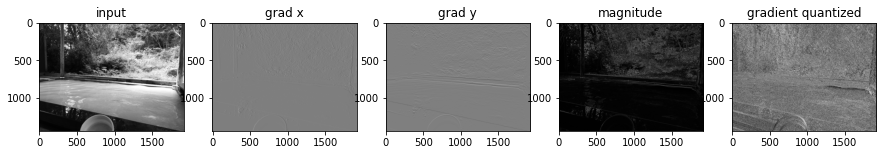

In [7]:
# Magnitude and gradient
def get_gradxy(gray):
    h, w = gray.shape

    # padding before grad
    _gray = np.pad(gray, (1, 1), 'edge').astype(float)

    # get grad x
    gx = _gray[1 : h + 1, 2 :] - _gray[1 : h + 1, : w]
    # get grad y
    gy = _gray[2 :, 1 : w + 1] - _gray[: h, 1 : w + 1]
    # replace 0 with 
    gx[np.abs(gx) <= 1e-10] = 1e-10
    return gx, gy

# get magnitude and gradient
def get_mag_grad(gx, gy):
    # get gradient maginitude
    mag = np.sqrt(gx ** 2 + gy ** 2)
    
    # get gradient angle
    grad = np.arctan(gy / gx)
    grad[grad < 0] = np.pi / 2 + grad[grad < 0] + np.pi / 2
    
    return mag, grad

# gradient histogram
def quantization(grad):
    # prepare quantization table
    grad_q = np.zeros_like(grad, dtype=float)
    
    # quantization base
    d = np.pi / 9
    
    # quantization
    for i in range(9):
        grad_q[np.where((grad >= d * i) & (grad <= d * (i + 1)))] = i
        
    return grad_q


# 1. gray -> gradient x and y
gx, gy = get_gradxy(img_gray)

# 2. get gradient magnitude and angle
mag, grad = get_mag_grad(gx, gy)

# 3. quantization
grad_q= quantization(grad)

fig, ax = plt.subplots(1, 5, figsize=(15, 2))
ax[0].set_title("input")
ax[0].imshow(img_gray, cmap="gray")
ax[1].set_title("grad x")
ax[1].imshow(gx, cmap="gray")
ax[2].set_title("grad y")
ax[2].imshow(gy, cmap="gray")
ax[3].set_title("magnitude")
ax[3].imshow(mag, cmap="gray")
ax[4].set_title("gradient quantized")
ax[4].imshow(grad_q, cmap="gray")
plt.show()

## Q.67 HOG (Step.2) 勾配ヒストグラム

ここではHOGの4を実装する。

N=8として、8x8の領域を1セルとして、勾配角度のインデックスに勾配強度を投票する形式でヒストグラムを作成せよ。

解答は

*   1 2 3
*   4 5 6
*   7 8 9

の順に量子化したインデックスに対応するヒストグラムを示す。

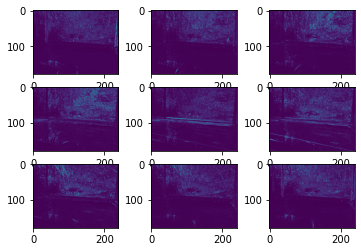

In [8]:
def gradient_histogram(grad_q, mag, n=8):
    h, w = mag.shape

    # get cell num
    cell_n_h = h // n
    cell_n_w = w // n
    histogram = np.zeros((cell_n_h, cell_n_w, 9), dtype=np.float32)

    # each pixel
    for y in range(cell_n_h):
        for x in range(cell_n_w):
            for j in range(n):
                for i in range(n):
                    histogram[y, x, int(grad_q[y * n + j, x * n + i])] += mag[y * n + j, x * n + i]

    return histogram

histogram = gradient_histogram(grad_q, mag)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(histogram[..., i])

## Q.68 HOG (Step.3) ヒストグラム正規化

ここではHOGの5を実装する。

C = 3 として、3 x 3のセルを1ブロックとして扱い、ヒストグラムの正規化を行え。

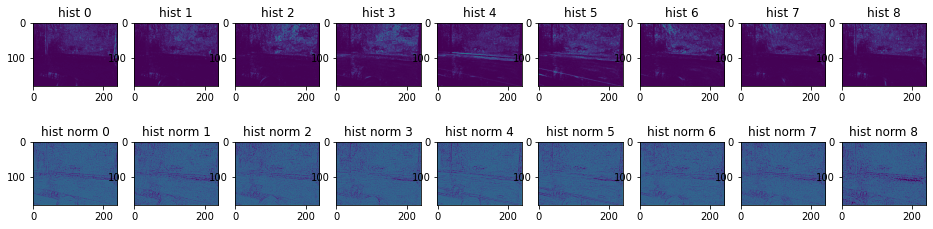

In [9]:
def hog_normalization(histogram, c=3, epsilon=1):
    cell_n_h, cell_n_w, hist_c = histogram.shape
    hist_norm = histogram.copy()
    
    ## each histogram
    for y in range(cell_n_h):
        for x in range(cell_n_w):
            for c in range(hist_c):
                hist_norm[y, x, c] /= np.sqrt(np.sum(histogram[max(y - 1, 0) : min(y + 2, cell_n_h), max(x - 1, 0) : min(x + 2, cell_n_w), c] ** 2) + epsilon)

    return hist_norm

histogram_norm = hog_normalization(histogram)

fig, ax = plt.subplots(2, 9, figsize=(16, 4))
for i in range(9):
    ax[0, i].set_title(f"hist {i}")
    ax[0, i].imshow(histogram[..., i])
    ax[1, i].set_title(f"hist norm {i}")
    ax[1, i].imshow(histogram_norm[..., i])
plt.show()

## Q.69 HOG (Step.4) 特徴量の描画

ここでは得られた特徴量を描画せよ。

描画は画像に重ねれば見やすい。

方法としては、セル内のインデックスごとに角度がついて直線を描けばよく、ヒストグラムの値が大きいほど白、値が小さいほど黒で描くと見やすい。

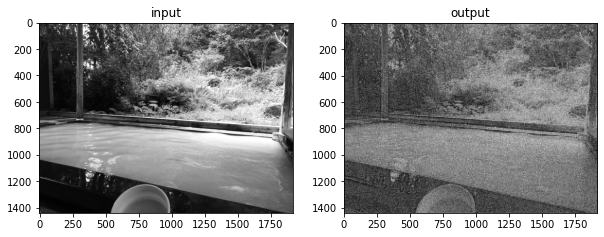

In [10]:
def draw_hog(gray, histogram, n=8):
    h, w = gray.shape
    cell_n_h, cell_n_w, _ = histogram.shape

    out = gray[1 :  h + 1, 1 :  w + 1].copy().astype(np.uint8)
    out = (out * 0.8).astype(np.uint8) 

    for y in range(cell_n_h):
        for x in range(cell_n_w):
            cx = x * n + n // 2
            cy = y * n + n // 2
            x1 = cx + n // 2 - 1
            y1 = cy
            x2 = cx - n // 2 + 1
            y2 = cy

            h = histogram[y, x] / np.sum(histogram[y, x])
            h /= h.max()

            for c in range(9):
                #angle = (20 * c + 10 - 90) / 180. * np.pi
                # get angle
                angle = (20 * c + 10) / 180. * np.pi
                rx = int(np.sin(angle) * (x1 - cx) + np.cos(angle) * (y1 - cy) + cx)
                ry = int(np.cos(angle) * (x1 - cx) - np.cos(angle) * (y1 - cy) + cy)
                lx = int(np.sin(angle) * (x2 - cx) + np.cos(angle) * (y2 - cy) + cx)
                ly = int(np.cos(angle) * (x2 - cx) - np.cos(angle) * (y2 - cy) + cy)

                # color is HOG value
                c = int(255. * h[c])

                # draw line
                cv2.line(out, (lx, ly), (rx, ry), (c, c, c), thickness=1)

    return out

# draw HOG
out = draw_hog(img_gray, histogram_norm)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].set_title("input")
ax[0].imshow(img_gray, cmap="gray")
ax[1].set_title("output")
ax[1].imshow(out, cmap="gray")
plt.show()

## Q.70 カラートラッキング

HSVを用いてイモリ部分を切り抜ける画像を作成せよ。

カラートラッキングとは特定の色の箇所を抽出する手法である。

ただし、RGBの状態で色成分を指定するのは256^3のパターンがあり、とても大変である（というか手動ではかなり難しい）ので、HSV変換を用いる。

HSV変換とは Q.5で用いた処理であるが、RGBをH(色相)、S(彩度)、V(明度)に変換する手法である。

*   Saturation(彩度) 彩度が小さいほど白、彩度が大きいほど色が濃くなる。 0<=S<=1
*   Value (明度) 明度が小さいほど黒くなり、明度が大きいほど色がきれいになる。 0<=V<=1
*   Hue(色相) 色を0<=H<=360の角度で表し、具体的には次のように表される。

カラートラッキングを行うにはHSV変換を行い、赤色部分が1となるような二値画像を出力すればよい。

ここではHSV変換をopencvの関数で行う。opencvでは0<=H<=180なので注意する。

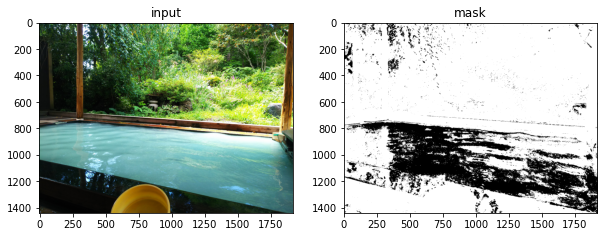

In [12]:
hsv = cv2.cvtColor(img_orig, cv2.COLOR_RGB2HSV)

def get_mask(hsv):
    h = hsv[..., 0]
    mask = np.zeros_like(h).astype(np.uint8)
    mask[((h < 90) | (h > 140))] = 1
    return mask

mask = get_mask(hsv)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].set_title("input")
ax[0].imshow(img_orig)
ax[1].set_title("mask")
ax[1].imshow(mask, cmap="gray")
plt.show()